## SHAP

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd

In [ ]:
X_train = pd.read_csv('/content/drive/MyDrive/머러컴피티션/2등cat/snd_scaling_sum_0612')
X_test = pd.read_csv('/content/drive/MyDrive/머러컴피티션/2등cat/snd_scaling_sum_te_0612')
y_train = pd.read_csv('/content/drive/MyDrive/머러컴피티션/y_train.csv').group

In [ ]:
!pip install shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 564 kB 13.6 MB/s 


In [ ]:
from lightgbm import LGBMClassifier

In [ ]:
X_test = tests.iloc[:,1:]

In [ ]:
X_train = trains.iloc[:,1:]

In [ ]:
import shap

# DF, based on which importance is checked
X_importance = X_test

# Explain model predictions using shap library:
model = LGBMClassifier(random_state=42).fit(X_train, y_train)
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_importance)
# Plot summary_plot as barplot:


In [ ]:
import numpy as np

In [ ]:
# Plot summary_plot as barplot:
shap.summary_plot(shap_values, X_importance, plot_type='bar')

shap_sum = np.abs(shap_values).mean(axis=1)[1,:]
importance_df = pd.DataFrame([X_importance.columns.tolist(), shap_sum.tolist()]).T
importance_df.columns = ['column_name', 'shap_importance']
importance_df = importance_df.sort_values('shap_importance', ascending=False)
importance_df

In [ ]:
features_selected = importance_df.query('shap_importance > 0').column_name.tolist()
X_train = X_train[features_selected]
X_test = X_test[features_selected]
X_train.shape, X_test.shape

In [ ]:
X_train.to_csv('/content/drive/MyDrive/머러컴피티션/2등cat/snd_sum_shap_0612.csv',index=False)
X_test.to_csv('/content/drive/MyDrive/머러컴피티션/2등cat/snd_sum_shap_te_0612.csv',index=False)

KeyboardInterrupt: ignored

In [ ]:
importance_df.sort_values(by='shap_importance')

,column_name,shap_importance
6829,143,0.0
388,피혁A,0.0
389,피혁B,0.0
390,행사장(남성),0.0
391,행사장(아동스포츠),0.0
...,...,...
893,143_y,0.031609
94,buyer_nm_2,0.033716
397,str_num,0.047493
6166,012,0.141705


## Select Percentile 사용안함

In [ ]:

from sklearn.linear_model import LogisticRegression


In [ ]:
from tqdm import tqdm_notebook

In [ ]:
from sklearn.feature_selection import SelectPercentile

In [ ]:
X_train

,custid,"('tot_amt', '총구매액')","('tot_amt', '구매건수')","('tot_amt', '평균구매가격')","('tot_amt', '최대구매액')","('dis_amt', 'dis_sum')","('dis_amt', 'dis_mean')","('net_amt', 'net_sum')","('net_amt', 'net_mean')","('inst_mon', '평균할부개월수')",...,290_y.1,291_y.1,292_y.1,293_y.1,294_y.1,295_y.1,296_y.1,297_y.1,298_y.1,299_y.1
0,0,-0.293513,-0.633002,1.127825,-0.111352,0.940309,2.571607,-0.337667,0.941247,1.655854,...,0.025205,0.075376,-0.026127,0.020272,0.066455,0.074516,0.003025,-0.007688,0.000025,-0.047235
1,2,0.450850,-0.633002,2.521014,1.943327,1.771518,2.571607,0.402053,2.524149,1.968527,...,0.050674,0.011514,-0.035542,0.041538,0.051321,0.064071,-0.026228,-0.017542,0.017235,-0.048381
2,3,-0.086565,0.127107,-0.352591,0.243567,0.092144,-0.136040,-0.091713,-0.358566,1.395293,...,0.032108,0.042062,-0.020763,0.013046,0.036354,0.056859,-0.027681,-0.022791,0.004830,-0.045060
3,4,-0.551781,-0.913042,2.521014,0.113145,-0.625723,0.760142,-0.546619,2.524149,1.968527,...,-0.050673,0.038452,-0.031526,-0.030664,0.014449,0.107517,-0.001095,0.000699,0.038245,-0.059429
4,5,0.933632,0.207118,1.119965,0.373988,2.862500,2.571607,0.861218,1.018847,0.033862,...,-0.013143,0.020082,-0.008855,-0.008070,0.008893,0.033612,0.004992,-0.014048,0.012123,-0.041459
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21582,29995,2.809384,1.967370,2.154048,2.135753,2.943781,1.582339,2.805620,2.163916,-0.067962,...,-0.033971,0.055632,0.002048,0.034850,0.031819,0.051526,0.028531,-0.020569,0.012007,-0.017410
21583,29996,-0.417533,-0.312956,-0.399985,-0.573174,0.319651,0.962035,-0.442910,-0.463251,-1.108835,...,0.046209,0.035309,-0.022592,0.030756,0.008134,0.024390,-0.052010,-0.046582,0.020725,-0.065425
21584,29997,0.267740,-0.272950,1.208851,2.351697,-0.435621,-0.525375,0.294861,1.286331,-0.611026,...,-0.048441,0.001251,0.004115,-0.012107,0.010463,0.058550,0.002735,-0.015641,0.060132,-0.024524
21585,29998,-0.687436,-0.552990,-0.795921,-0.827603,-0.703511,-0.869820,-0.684180,-0.783029,0.645679,...,0.016526,0.039277,-0.027331,0.031321,0.064676,0.089480,-0.003546,-0.049122,-0.000275,-0.085459


In [ ]:
X_test

,custid,"('tot_amt', '총구매액')","('tot_amt', '구매건수')","('tot_amt', '평균구매가격')","('tot_amt', '최대구매액')","('dis_amt', 'dis_sum')","('dis_amt', 'dis_mean')","('net_amt', 'net_sum')","('net_amt', 'net_mean')","('inst_mon', '평균할부개월수')",...,290_y.1,291_y.1,292_y.1,293_y.1,294_y.1,295_y.1,296_y.1,297_y.1,298_y.1,299_y.1
0,30001,0.601835,0.007090,1.048951,0.651937,0.363528,0.357071,0.610963,1.075411,-0.197024,...,-0.040180,0.047090,0.008682,0.038145,0.009333,0.027028,0.014088,-0.014288,0.046206,-0.062782
1,30002,2.051371,2.647468,-0.308425,-0.207565,2.387655,-0.123543,2.036317,-0.313224,0.349984,...,0.001858,0.047916,-0.025152,0.024830,0.044022,0.034047,-0.016670,-0.010919,-0.004323,-0.015053
2,30003,-0.422602,0.807204,-1.194840,-0.789118,-0.640212,-1.111062,-0.412320,-1.193446,-0.885447,...,0.003580,0.017218,-0.014720,0.006205,0.045161,0.024854,-0.021122,-0.024591,0.032285,-0.050156
3,30005,-0.890109,-0.993053,-0.709342,-0.936644,-0.813770,-0.212884,-0.890723,-0.726027,1.968527,...,-0.021172,0.064441,0.031339,-0.024464,0.052221,0.035927,0.065400,-0.019777,0.006919,-0.105012
4,30007,-0.829502,-0.833031,-0.849807,-0.936644,-0.745950,-0.649498,-0.829698,-0.850224,-0.897643,...,0.032589,0.072660,-0.049550,0.034544,0.079088,0.043103,0.010134,-0.007682,0.001850,-0.034415
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14375,49988,-0.704814,-0.913042,1.121234,-0.179770,-0.525020,1.677032,-0.708839,1.084110,0.678750,...,0.036801,0.033519,0.017784,-0.037200,0.048447,-0.029267,0.021850,0.007506,0.060524,0.000613
14376,49990,-0.860072,-0.993053,2.118083,-0.628763,-0.740298,2.571607,-0.861563,2.069828,1.968527,...,0.105177,0.112041,-0.029446,0.031741,0.102884,0.126583,-0.081062,-0.036445,-0.009262,-0.092480
14377,49992,-0.857107,-0.993053,0.260320,-0.724976,-0.736188,0.788210,-0.858647,0.232808,-1.470878,...,0.017877,0.071175,-0.048186,0.027405,0.035541,0.034659,-0.034902,-0.029529,-0.046331,-0.019620
14378,49993,-0.885999,-0.913042,-1.094356,-0.934506,-0.813770,-0.952009,-0.885666,-1.089521,-1.470878,...,-0.046346,-0.024382,0.019836,-0.039345,0.043723,0.028980,-0.016225,-0.004561,0.066157,-0.002222


In [ ]:
target = y_train

In [ ]:
target

0        M30
1        M30
2        F20
3        F20
4        M40
        ... 
21582    M50
21583    F20
21584    M30
21585    F20
21586    F20
Name: group, Length: 21587, dtype: object

In [ ]:
X_train

In [ ]:
train_data = X_train.iloc[:,1:]

In [ ]:
from sklearn.model_selection import cross_val_score

In [ ]:
# Visualization
import matplotlib.pylab as plt
from matplotlib import font_manager, rc
import seaborn as sns
%matplotlib inline

In [ ]:
train_data

,"('tot_amt', '총구매액')","('tot_amt', '구매건수')","('tot_amt', '평균구매가격')","('tot_amt', '최대구매액')","('dis_amt', 'dis_sum')","('dis_amt', 'dis_mean')","('net_amt', 'net_sum')","('net_amt', 'net_mean')","('inst_mon', '평균할부개월수')","('inst_mon', '최대할부개월수')",...,290_y.1,291_y.1,292_y.1,293_y.1,294_y.1,295_y.1,296_y.1,297_y.1,298_y.1,299_y.1
0,-0.293513,-0.633002,1.127825,-0.111352,0.940309,2.571607,-0.337667,0.941247,1.655854,-0.265171,...,0.025205,0.075376,-0.026127,0.020272,0.066455,0.074516,0.003025,-0.007688,0.000025,-0.047235
1,0.450850,-0.633002,2.521014,1.943327,1.771518,2.571607,0.402053,2.524149,1.968527,2.788168,...,0.050674,0.011514,-0.035542,0.041538,0.051321,0.064071,-0.026228,-0.017542,0.017235,-0.048381
2,-0.086565,0.127107,-0.352591,0.243567,0.092144,-0.136040,-0.091713,-0.358566,1.395293,0.956165,...,0.032108,0.042062,-0.020763,0.013046,0.036354,0.056859,-0.027681,-0.022791,0.004830,-0.045060
3,-0.551781,-0.913042,2.521014,0.113145,-0.625723,0.760142,-0.546619,2.524149,1.968527,2.788168,...,-0.050673,0.038452,-0.031526,-0.030664,0.014449,0.107517,-0.001095,0.000699,0.038245,-0.059429
4,0.933632,0.207118,1.119965,0.373988,2.862500,2.571607,0.861218,1.018847,0.033862,-0.265171,...,-0.013143,0.020082,-0.008855,-0.008070,0.008893,0.033612,0.004992,-0.014048,0.012123,-0.041459
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21582,2.809384,1.967370,2.154048,2.135753,2.943781,1.582339,2.805620,2.163916,-0.067962,-0.265171,...,-0.033971,0.055632,0.002048,0.034850,0.031819,0.051526,0.028531,-0.020569,0.012007,-0.017410
21583,-0.417533,-0.312956,-0.399985,-0.573174,0.319651,0.962035,-0.442910,-0.463251,-1.108835,-0.265171,...,0.046209,0.035309,-0.022592,0.030756,0.008134,0.024390,-0.052010,-0.046582,0.020725,-0.065425
21584,0.267740,-0.272950,1.208851,2.351697,-0.435621,-0.525375,0.294861,1.286331,-0.611026,0.956165,...,-0.048441,0.001251,0.004115,-0.012107,0.010463,0.058550,0.002735,-0.015641,0.060132,-0.024524
21585,-0.687436,-0.552990,-0.795921,-0.827603,-0.703511,-0.869820,-0.684180,-0.783029,0.645679,-0.265171,...,0.016526,0.039277,-0.027331,0.031321,0.064676,0.089480,-0.003546,-0.049122,-0.000275,-0.085459


In [ ]:
test_data = X_test.iloc[:,1:]

In [ ]:
test_data 

,"('tot_amt', '총구매액')","('tot_amt', '구매건수')","('tot_amt', '평균구매가격')","('tot_amt', '최대구매액')","('dis_amt', 'dis_sum')","('dis_amt', 'dis_mean')","('net_amt', 'net_sum')","('net_amt', 'net_mean')","('inst_mon', '평균할부개월수')","('inst_mon', '최대할부개월수')",...,290_y.1,291_y.1,292_y.1,293_y.1,294_y.1,295_y.1,296_y.1,297_y.1,298_y.1,299_y.1
0,0.601835,0.007090,1.048951,0.651937,0.363528,0.357071,0.610963,1.075411,-0.197024,-0.265171,...,-0.040180,0.047090,0.008682,0.038145,0.009333,0.027028,0.014088,-0.014288,0.046206,-0.062782
1,2.051371,2.647468,-0.308425,-0.207565,2.387655,-0.123543,2.036317,-0.313224,0.349984,-0.265171,...,0.001858,0.047916,-0.025152,0.024830,0.044022,0.034047,-0.016670,-0.010919,-0.004323,-0.015053
2,-0.422602,0.807204,-1.194840,-0.789118,-0.640212,-1.111062,-0.412320,-1.193446,-0.885447,-0.265171,...,0.003580,0.017218,-0.014720,0.006205,0.045161,0.024854,-0.021122,-0.024591,0.032285,-0.050156
3,-0.890109,-0.993053,-0.709342,-0.936644,-0.813770,-0.212884,-0.890723,-0.726027,1.968527,-0.265171,...,-0.021172,0.064441,0.031339,-0.024464,0.052221,0.035927,0.065400,-0.019777,0.006919,-0.105012
4,-0.829502,-0.833031,-0.849807,-0.936644,-0.745950,-0.649498,-0.829698,-0.850224,-0.897643,-0.265171,...,0.032589,0.072660,-0.049550,0.034544,0.079088,0.043103,0.010134,-0.007682,0.001850,-0.034415
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14375,-0.704814,-0.913042,1.121234,-0.179770,-0.525020,1.677032,-0.708839,1.084110,0.678750,-0.265171,...,0.036801,0.033519,0.017784,-0.037200,0.048447,-0.029267,0.021850,0.007506,0.060524,0.000613
14376,-0.860072,-0.993053,2.118083,-0.628763,-0.740298,2.571607,-0.861563,2.069828,1.968527,1.566833,...,0.105177,0.112041,-0.029446,0.031741,0.102884,0.126583,-0.081062,-0.036445,-0.009262,-0.092480
14377,-0.857107,-0.993053,0.260320,-0.724976,-0.736188,0.788210,-0.858647,0.232808,-1.470878,-1.486507,...,0.017877,0.071175,-0.048186,0.027405,0.035541,0.034659,-0.034902,-0.029529,-0.046331,-0.019620
14378,-0.885999,-0.913042,-1.094356,-0.934506,-0.813770,-0.952009,-0.885666,-1.089521,-1.470878,-1.486507,...,-0.046346,-0.024382,0.019836,-0.039345,0.043723,0.028980,-0.016225,-0.004561,0.066157,-0.002222


This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


  0%|          | 0/7 [00:00<?, ?it/s]

Features [  19   22  186  189  190  191  192  193  194  198  201  202  203  204
  205  206  208  210  211  213  214  215  216  217  218  287  288  300
  301  313  314  335  352  359  368  378  380  382  389  390  391  392
  393  394 1058 1214 4475 4746 6870 7248 7251 7415 7418 7419 7420 7421
 7422 7423 7427 7430 7431 7432 7433 7434 7435 7437 7439 7440 7442 7443
 7444 7445 7446 7447 7516 7517 7529 7530 7542 7543 7564 7581 7588 7597
 7607 7609 7611 7618 7619 7620 7621 7622 7623] are constant.
invalid value encountered in true_divide
lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Incre

(7, -1.5149056303242925)


Features [  19   22  186  189  190  191  192  193  194  198  201  202  203  204
  205  206  208  210  211  213  214  215  216  217  218  287  288  300
  301  313  314  335  352  359  368  378  380  382  389  390  391  392
  393  394 1058 1214 4475 4746 6870 7248 7251 7415 7418 7419 7420 7421
 7422 7423 7427 7430 7431 7432 7433 7434 7435 7437 7439 7440 7442 7443
 7444 7445 7446 7447 7516 7517 7529 7530 7542 7543 7564 7581 7588 7597
 7607 7609 7611 7618 7619 7620 7621 7622 7623] are constant.
invalid value encountered in true_divide


(21587, 8278)


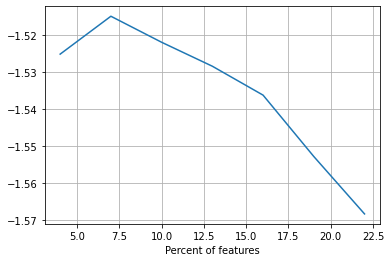

In [ ]:
#GradientBoostingClassifier
model = LogisticRegression(random_state=0)

# 각 특성과 타깃(class) 사이에 유의한 통계적 관계가 있는지 계산하여 특성을 선택하는 방법 
cv_scores = []
for p in tqdm_notebook(range(4,25,3)): # 퍼센트별로 스코어를 냄- > 성능이 잘나오는 지점
    X_new = SelectPercentile(percentile=p).fit_transform(train_data, target)    
    cv_score = cross_val_score(model, X_new, target, scoring='neg_log_loss', cv=5).mean()
    cv_scores.append((p,cv_score))

# Print the best percentile
best_score = cv_scores[np.argmax([score for _, score in cv_scores])]
print(best_score)

# Plot the performance change with p
plt.plot([k for k, _ in cv_scores], [score for _, score in cv_scores])
plt.xlabel('Percent of features')
plt.grid()

# 과적합을 피하기 위해 최적의 p값 주변의 값을 선택하는게 더 나은 결과를 얻을 수 있다. 
fs = SelectPercentile(percentile=best_score[0]).fit(train_data, target)
ca_train_data = fs.transform(train_data)
ca_test_data = fs.transform(test_data)

print(train_data.shape)

In [ ]:
train = train_data[train_data.iloc[:,:].columns[fs.get_support()].tolist()]
test= test_data[test_data.iloc[:,:].columns[fs.get_support()].tolist()]

In [ ]:
train.to_csv('/content/drive/MyDrive/머러컴피티션/2등 features/snd_scaling_sum_percentile_0612',index=False)
test.to_csv('/content/drive/MyDrive/머러컴피티션/2등 features/snd_scaling_sum_percentile_te_0612',index=False)

## 상위권팀 selection 사용안함

In [ ]:
clf = LogisticRegression(random_state = 0)

In [ ]:
from sklearn.feature_selection import SelectFromModel

In [ ]:
train = pd.read_csv('/content/drive/MyDrive/머러컴피티션/2등cat/snd_scaling_sum_0612')
test = pd.read_csv('/content/drive/MyDrive/머러컴피티션/2등cat/snd_scaling_sum_te_0612')
target = pd.read_csv('/content/drive/MyDrive/머러컴피티션/y_train.csv').group

In [ ]:
all_features_train_fs = train.iloc[:,1:]
all_features_test_fs = test.iloc[:,1:]

In [ ]:
all_features_test_fs

,"('tot_amt', '총구매액')","('tot_amt', '구매건수')","('tot_amt', '평균구매가격')","('tot_amt', '최대구매액')","('dis_amt', 'dis_sum')","('dis_amt', 'dis_mean')","('net_amt', 'net_sum')","('net_amt', 'net_mean')","('inst_mon', '평균할부개월수')","('inst_mon', '최대할부개월수')",...,290_y.1,291_y.1,292_y.1,293_y.1,294_y.1,295_y.1,296_y.1,297_y.1,298_y.1,299_y.1
0,0.601835,0.007090,1.048951,0.651937,0.363528,0.357071,0.610963,1.075411,-0.197024,-0.265171,...,-0.040180,0.047090,0.008682,0.038145,0.009333,0.027028,0.014088,-0.014288,0.046206,-0.062782
1,2.051371,2.647468,-0.308425,-0.207565,2.387655,-0.123543,2.036317,-0.313224,0.349984,-0.265171,...,0.001858,0.047916,-0.025152,0.024830,0.044022,0.034047,-0.016670,-0.010919,-0.004323,-0.015053
2,-0.422602,0.807204,-1.194840,-0.789118,-0.640212,-1.111062,-0.412320,-1.193446,-0.885447,-0.265171,...,0.003580,0.017218,-0.014720,0.006205,0.045161,0.024854,-0.021122,-0.024591,0.032285,-0.050156
3,-0.890109,-0.993053,-0.709342,-0.936644,-0.813770,-0.212884,-0.890723,-0.726027,1.968527,-0.265171,...,-0.021172,0.064441,0.031339,-0.024464,0.052221,0.035927,0.065400,-0.019777,0.006919,-0.105012
4,-0.829502,-0.833031,-0.849807,-0.936644,-0.745950,-0.649498,-0.829698,-0.850224,-0.897643,-0.265171,...,0.032589,0.072660,-0.049550,0.034544,0.079088,0.043103,0.010134,-0.007682,0.001850,-0.034415
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14375,-0.704814,-0.913042,1.121234,-0.179770,-0.525020,1.677032,-0.708839,1.084110,0.678750,-0.265171,...,0.036801,0.033519,0.017784,-0.037200,0.048447,-0.029267,0.021850,0.007506,0.060524,0.000613
14376,-0.860072,-0.993053,2.118083,-0.628763,-0.740298,2.571607,-0.861563,2.069828,1.968527,1.566833,...,0.105177,0.112041,-0.029446,0.031741,0.102884,0.126583,-0.081062,-0.036445,-0.009262,-0.092480
14377,-0.857107,-0.993053,0.260320,-0.724976,-0.736188,0.788210,-0.858647,0.232808,-1.470878,-1.486507,...,0.017877,0.071175,-0.048186,0.027405,0.035541,0.034659,-0.034902,-0.029529,-0.046331,-0.019620
14378,-0.885999,-0.913042,-1.094356,-0.934506,-0.813770,-0.952009,-0.885666,-1.089521,-1.470878,-1.486507,...,-0.046346,-0.024382,0.019836,-0.039345,0.043723,0.028980,-0.016225,-0.004561,0.066157,-0.002222


In [ ]:
from sklearn.feature_selection import SelectFromModel

In [ ]:
smf = SelectFromModel(clf, threshold='2.0*mean') # 변경가능
smf.fit(all_features_train_fs, target)

X_new = smf.transform(all_features_train_fs)
X_te_new = smf.transform(all_features_test_fs)

feature_selection_idx = smf.get_support()
feature_selection_name = all_features_train_fs.columns[feature_selection_idx]

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [ ]:
all_features_train_fs.columns[feature_selection_idx]

Index(['11월합계할인금액', '아동', '아동문화', '유아동복', '('max', 12)', '('min', 6)',
       '('min', 9)', '영트랜드_corner구매비율', '수입명품_bn구매비율', '디자이너부띠끄_bn구매비율',
       ...
       '0680', '0681', '0683', '0684', '0686', '0690', '11월합계할인금액.1', '아동.2',
       '아동문화.2', '유아동복.2'],
      dtype='object', length=516)

In [ ]:
X_new = pd.DataFrame(X_new)
X_te_new = pd.DataFrame(X_te_new)

X_new.columns = feature_selection_name
X_te_new.columns = feature_selection_name

In [ ]:
X_new.to_csv('/content/drive/MyDrive/머러컴피티션/2등 features/Snd_scale_modelselect_0612.csv',index=False)
X_te_new.to_csv('/content/drive/MyDrive/머러컴피티션/2등 features/Snd_scale_modelselect_te_0612.csv',index=False)

In [ ]:
X_new.to_csv('/content/drive/MyDrive/머러컴피티션/2등 features/snd_scale_modelselect_0612.csv',index=False)
X_te_new.to_csv('/content/drive/MyDrive/머러컴피티션/2등 features/snd_scale_modelselect_te_0612.csv',index=False)

In [ ]:
X_te_new

,11월합계할인금액,아동,아동문화,유아동복,"('max', 12)","('min', 6)","('min', 9)",영트랜드_corner구매비율,수입명품_bn구매비율,디자이너부띠끄_bn구매비율,...,0680,0681,0683,0684,0686,0690,11월합계할인금액.1,아동.2,아동문화.2,유아동복.2
0,-0.519352,-0.300358,-0.345658,-0.523027,-0.151373,0.214243,0.035361,-0.251650,-0.336228,-0.211763,...,-0.044468,-0.029356,-0.021106,-0.017039,-0.035749,-0.009855,-0.519352,-0.300358,-0.345658,-0.523027
1,2.668459,-0.300358,-0.345658,1.472699,0.405326,0.225650,0.017465,0.180618,-0.336228,-0.211763,...,-0.071400,-0.046960,-0.033612,-0.027068,-0.056133,-0.015371,2.668459,-0.300358,-0.345658,1.472699
2,-0.345941,-0.300358,3.674477,-0.523027,-0.046186,-0.253413,-0.084286,-0.251650,-0.336228,-0.211763,...,-0.020538,-0.013604,-0.009820,-0.007946,-0.016849,-0.004674,-0.345941,-0.300358,3.674477,-0.523027
3,-0.519352,-0.300358,-0.345658,-0.523027,-0.388541,0.351118,-0.028553,-0.251650,-0.336228,-0.211763,...,-0.020538,-0.013604,-0.009820,-0.007946,-0.016849,-0.004674,-0.519352,-0.300358,-0.345658,-0.523027
4,-0.519352,-0.300358,-0.345658,-0.523027,-0.388541,0.026040,-0.028553,-0.251650,-0.336228,-0.211763,...,-0.020538,-0.013604,-0.009820,-0.007946,-0.016849,-0.004674,-0.519352,-0.300358,-0.345658,-0.523027
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14375,1.594787,-0.300358,-0.345658,-0.190406,-0.388541,0.026040,-0.028553,-0.251650,-0.336228,-0.211763,...,-0.025534,-0.016901,-0.012190,-0.009858,-0.020858,-0.005778,1.594787,-0.300358,-0.345658,-0.190406
14376,-0.519352,-0.300358,-0.345658,-0.523027,-0.388541,0.026040,-0.028553,-0.251650,-0.336228,-0.211763,...,-0.044468,-0.029356,-0.021106,-0.017039,-0.035749,-0.009855,-0.519352,-0.300358,-0.345658,-0.523027
14377,-0.519352,-0.300358,-0.345658,-0.523027,-0.388541,0.026040,-0.028553,-0.251650,-0.336228,-0.211763,...,-0.017457,-0.011568,-0.008355,-0.006762,-0.014359,-0.003986,-0.519352,-0.300358,-0.345658,-0.523027
14378,-0.519352,-0.300358,0.659376,-0.190406,-0.388541,0.026040,-0.028553,-0.251650,-0.336228,-0.211763,...,-0.020538,-0.013604,-0.009820,-0.007946,-0.016849,-0.004674,-0.519352,-0.300358,0.659376,-0.190406
